# Merge and read csv_files

In [14]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Path to your folder
folder_path = "../../csv_files"

# Find all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Read and concatenate all CSVs into one DataFrame
df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)

# Show the combined DataFrame
df = df[df["Experiment"] == "FR_increasing_rate"]
df.head()

,Name,Experiment,Trial,Sequence,Recall
0,av,FR_increasing_rate,1,t n c e u h f g b x z m l s p,m s l p b n x e f g
1,av,FR_increasing_rate,2,l j c p t o h f y i d v u e z,z e u v t l
2,av,FR_increasing_rate,3,g u f z j y t s b c e d r x l,d r x l f u z g b
3,av,FR_increasing_rate,4,e n u k f y s x r q o c p g j,c j e f x g
4,av,FR_increasing_rate,5,b i x o m d a g v s c z p h n,b i x o n s


# Get positions and amount of correct recall

In [15]:
def add_position_and_correct_guesses(df, sequence_col="Sequence", recall_col="Recall"):
    # Helper function to get correct positions as a string
    def get_positions(row):
        s = row[sequence_col].split()
        r = row[recall_col].split()
        positions = []
        for i, word in enumerate(s):
            if word in r:
                positions.append(str(i))
        return " ".join(positions)

    # Add column with correct positions
    df["Position correct recall"] = df.apply(get_positions, axis=1)
    # Add column with amount of correct guesses
    df["Amount of correct guesses"] = df["Position correct recall"].apply(lambda x: len(x.split()))
    return df

df = add_position_and_correct_guesses(df)
df.head()

,Name,Experiment,Trial,Sequence,Recall,Position correct recall,Amount of correct guesses
0,av,FR_increasing_rate,1,t n c e u h f g b x z m l s p,m s l p b n x e f g,1 3 6 7 8 9 11 12 13 14,10
1,av,FR_increasing_rate,2,l j c p t o h f y i d v u e z,z e u v t l,0 4 11 12 13 14,6
2,av,FR_increasing_rate,3,g u f z j y t s b c e d r x l,d r x l f u z g b,0 1 2 3 8 11 12 13 14,9
3,av,FR_increasing_rate,4,e n u k f y s x r q o c p g j,c j e f x g,0 4 7 11 13 14,6
4,av,FR_increasing_rate,5,b i x o m d a g v s c z p h n,b i x o n s,0 1 2 3 9 14,6


# Primacy and recency effect

In [8]:
# Total amount of FR experiments done
amount_of_experiments = df.shape[0]
print("Amount of FR experiments:", amount_of_experiments)

# Combine the lists of the correct positions to 1 big list
all_correct_positions= []
for row in df["Position correct recall"]:
    row = row.split()
    all_correct_positions.extend(row)
all_correct_positions = [int(x) for x in all_correct_positions]

# Average correct
average_correct = len(all_correct_positions) / amount_of_experiments
print("Average ammount of correct per experiment:", average_correct)

# Count of correct guesses for each position
correct_per_position= [all_correct_positions.count(position) for position in range(15)]

# Percent correct at each position out of all experiments
position_correct_percent = [corrects/amount_of_experiments*100 for corrects in correct_per_position] 

Amount of FR experiments: 60
Average ammount of correct per experiment: 8.033333333333333


Text(0.5, 1.0, 'Free Recall Increased Rate')

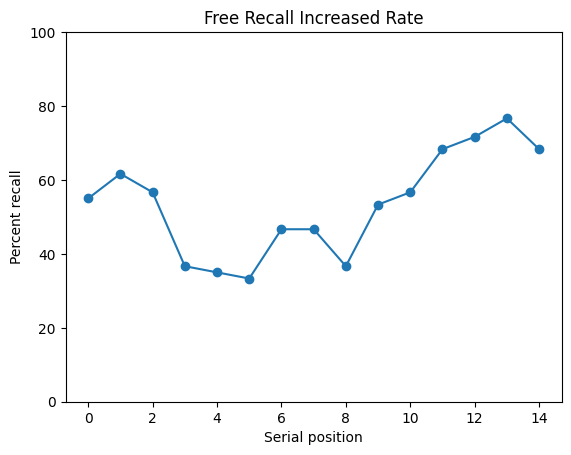

In [16]:
plt.plot(position_correct_percent, marker="o")
plt.xlabel("Serial position")
plt.ylim(0,100)
plt.ylabel("Percent recall")
plt.title("Free Recall Increased Rate")

# Confidence Interval for amount of correct guesses

In [10]:
num_correct_in_experiments=df["Amount of correct guesses"].to_numpy()
num_correct_in_experiments

array([10,  6,  9,  6,  6,  6,  6,  7,  7,  6,  5,  7,  7,  7,  7,  6,  7,
        9,  2,  5, 11, 11, 10, 10, 11,  9,  8,  8, 10,  9, 10, 11, 12, 10,
       10,  9,  9, 11,  9,  9,  9, 10,  8,  7,  8,  7,  7,  8,  6,  6,  7,
        7,  8,  8,  7,  8,  9,  6,  9,  9])

In [11]:
x = num_correct_in_experiments
stats.t.interval(0.95, df = len(x)-1 , loc = x.mean(), scale = x.std(ddof=1)/np.sqrt(len(x)))

(np.float64(7.54373031228522), np.float64(8.522936354381446))

The confidence interval for the mean of correct guesses for the FR increased rate experiment is:

$[7.54 : 8.52]$